<a href="https://colab.research.google.com/github/ARPITJAIN0999/Brand-Intelligence-Solution/blob/main/AJ_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brand Intelligence Solution -  (ADS Track Transfer Case Study)

Using AI and NLP build a solution that can analyze the consumner feedback captured in the form of product reviews to identify the customer needs and helping the company to focus on them so that they can enter the competitive market

Importing the Necessary Libraries and Loading the Data

In [ ]:
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install re
!pip install nltk
!pip install stanfordnlp
!pip install tqdm
!pip install gensim
!pip install warnings
!pip install wordcloud
!pip install textblob
!pip install heapq
!pip install collections
!pip install plotly
!pip install datapane
!pip install sentence_transformers
!pip install dataprep
!pip install "dask[complete]"
!pip install shap
!pip install pyyaml==5.4.1

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
from nltk.stem.porter import *
import string
import stanfordnlp
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import word2vec
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from gensim import corpora, models
from wordcloud import WordCloud
import gensim
from textblob import TextBlob
from heapq import nlargest
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from dataprep.eda.missing import plot_missing
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 
import shap,sklearn
warnings.filterwarnings('ignore')

In [ ]:
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
"""Function to svae generated figures in directory you're working"""
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **Preprocessing the Data**

In [ ]:
train = pd.read_csv('./Raw_Data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9185 entries, 0 to 9184
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       9185 non-null   int64  
 1   content  9185 non-null   object 
 2   date     9185 non-null   object 
 3   product  9183 non-null   object 
 4   brand    8988 non-null   object 
 5   rating   9185 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 430.7+ KB


In [ ]:
train.head(20)

,id,content,date,product,brand,rating
0,1,Super super sweet . It is like drinking sugar ...,2021-06-21 00:13:00,beverage-bud-light-lime-water-melon-rita-malt,Budweiser,2.0
1,2,Never a bad choice . While this is not my favo...,2019-10-12 01:28:00,goose-island-goose-ipa,Goose Island,4.0
2,3,I enjoy Rolling Rock on a super hot summer day...,2018-06-24 18:06:00,rolling-rock-extra-pale-beer-6pk12-fl-oz-bottles,Rolling Rock,5.0
3,4,Our go to beer at home ! We always pick up a p...,2017-05-05 10:32:00,corona-extra,Corona,5.0
4,6,The flavor is great and the after taste is bet...,2017-01-14 05:18:00,coors-non-alcoholic-malt-beverage-beer-6pk12-f...,Coors,4.0
5,7,"Best beer I have ever had . Light , refreshing...",2018-01-12 01:35:00,presidente-pilsner-type-beer-cerveza,Presidente,5.0
6,9,I love this beer . This is the first Shandy th...,2018-03-13 03:28:00,leinenliugels-lemon-summer-shandy-traditional-...,Leinenkugel,5.0
7,11,Michelob Ultra is a smooth and refreshing beer...,2020-01-30 20:51:00,michelob-ultra-superior-light-beer-12pk12-fl-o...,Michelob,4.0
8,12,"Summer shandy is so refreshing , especially on...",2018-01-05 01:27:00,leinenliugels-lemon-summer-shandy-traditional-...,Leinenkugel,4.0
9,13,This is my favorite flavor of the Lime - A - R...,2015-06-23 17:10:00,bud-light-lime-lemon-ade-rita,Bud Light,5.0


In [ ]:
train.isnull().sum(axis = 0)

id           0
content      0
date         0
product      2
brand      197
rating       0
dtype: int64


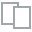
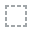
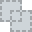
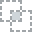
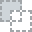
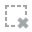
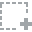
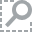
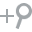
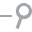
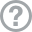
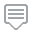
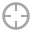
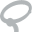
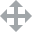
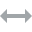
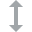
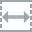
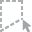
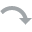
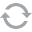
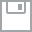
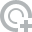
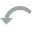
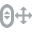
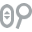
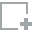
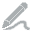
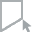
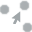
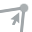
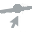

In [ ]:
plot_missing(train.copy())

So the data have 2 null products (in which the brand as well is missing) and 197 null brands. Now we will fill the Null products with "Unknown" as we have no idea about these products and prepare a strategy to deal with null brands.

To define brands the approach is to extract product keywords and use them to define the Unknown brands

In [ ]:
id = train[(train.brand.isnull())].id
train[train.id.isin(id)].head(20)

,id,content,date,product,brand,rating
15,19,The only kind I will drink . The light and ref...,2020-08-21 14:39:00,michelob-ultra-pure-gold-superior-light-beer-1,NaN,5.0
43,54,"Normally I prefer bottled beer , but for some ...",2017-01-25 13:17:00,guinness-extra-stout-beer-12pk112-fl-oz-bottles,NaN,5.0
46,60,"I work with Heineken , so I work lots of promo...",2015-12-04 00:10:00,heineken-light-lager-beer-bottles,NaN,5.0
47,61,This is one of our go to beers . Its got a gre...,2015-11-30 23:38:00,heineken-light-lager-beer-bottles,NaN,4.0
134,186,I was pretty excited to try this beer because ...,2016-08-12 03:33:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,NaN,2.0
135,187,Light crisp taste ! My go to beer at any funct...,2016-07-15 01:48:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,NaN,5.0
136,188,These are perfect for an inexpensive beer that...,2016-06-08 02:47:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,NaN,5.0
137,190,I have tried Bud Light Platinum on a few diffe...,2016-03-04 11:35:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,NaN,3.0
138,191,Bud Light has always been and always will be m...,2018-09-18 15:45:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,NaN,5.0
139,193,Tastes like bud light but higher alcohol perce...,2018-05-02 12:35:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,NaN,5.0


In [ ]:
"""" Filling the null product with Unknown Keyword """
train['product'] = train['product'].fillna("Unknown")

"""" Approach is to extract product keywords 
    and use them to define the Unknown brands """ 

def convertprodname(name):
    position_ = name.find('-')
    if(position_ == -1):
        position_ = name.find(' ')
    return name[:position_]
train['product_key'] = train['product'].apply(lambda x: convertprodname(x))


product_key_brand_dic = train[train['brand'].notnull()].drop_duplicates()[['product_key','brand']].set_index('product_key').T.to_dict('list')

for i,row in train.iterrows():
    if(row.brand != row.brand):
        try:
            brand_null = product_key_brand_dic[row.product_key]
        except:
            brand_null = row.product_key
        brand_null = str(brand_null)
        brand_null = brand_null.replace("[",'').replace("]",'').replace('"','').replace("'",'')
        train.at[i,'brand'] = brand_null

In [ ]:
train[train.id.isin(id)].head(20)

,id,content,date,product,brand,rating,product_key
15,19,The only kind I will drink . The light and ref...,2020-08-21 14:39:00,michelob-ultra-pure-gold-superior-light-beer-1,Michelob,5.0,michelob
43,54,"Normally I prefer bottled beer , but for some ...",2017-01-25 13:17:00,guinness-extra-stout-beer-12pk112-fl-oz-bottles,Guinness,5.0,guinness
46,60,"I work with Heineken , so I work lots of promo...",2015-12-04 00:10:00,heineken-light-lager-beer-bottles,Heineken,5.0,heineken
47,61,This is one of our go to beers . Its got a gre...,2015-11-30 23:38:00,heineken-light-lager-beer-bottles,Heineken,4.0,heineken
134,186,I was pretty excited to try this beer because ...,2016-08-12 03:33:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,Bud Light,2.0,bud
135,187,Light crisp taste ! My go to beer at any funct...,2016-07-15 01:48:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,Bud Light,5.0,bud
136,188,These are perfect for an inexpensive beer that...,2016-06-08 02:47:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,Bud Light,5.0,bud
137,190,I have tried Bud Light Platinum on a few diffe...,2016-03-04 11:35:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,Bud Light,3.0,bud
138,191,Bud Light has always been and always will be m...,2018-09-18 15:45:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,Bud Light,5.0,bud
139,193,Tastes like bud light but higher alcohol perce...,2018-05-02 12:35:00,bud-light-platinum-beer-12pk12-fl-oz-slim-cans,Bud Light,5.0,bud


## Exploratory Data Analysis

Text(0, 0.5, 'Frequency of Reviews')

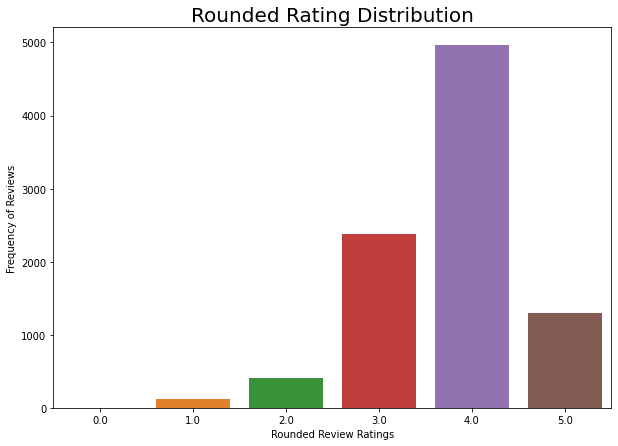

In [ ]:
ratings = np.rint(train.rating).value_counts()
ax,fig = plt.subplots(figsize = (10,7))
ax = sns.barplot(ratings.index,ratings.values)
plt.title("Rounded Rating Distribution", fontsize=20)
plt.xlabel('Rounded Review Ratings', fontsize=10)
plt.ylabel('Frequency of Reviews', fontsize=10)

In [ ]:
train['word_count'] = train['content'].apply(lambda x: len(str(x).split()))
train['review_len'] = train['content'].astype(str).apply(len)

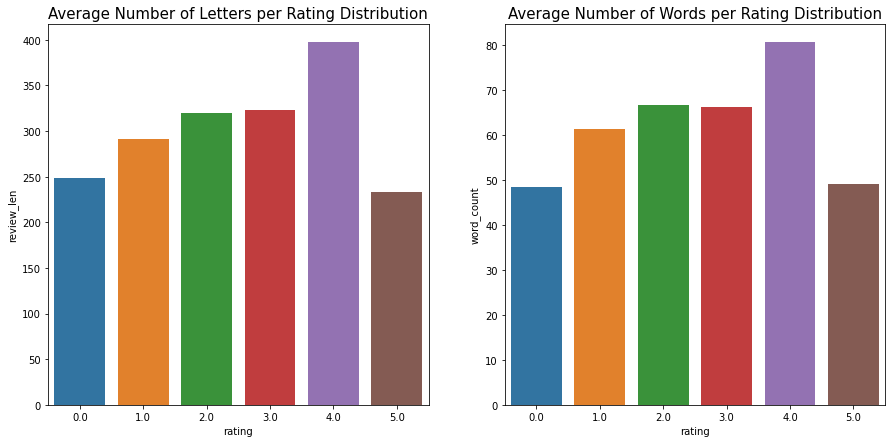

In [ ]:
train_r = train.copy()
train_r['rating'] = train_r['rating'].apply(np.rint)
fig,axes = plt.subplots(1,2,figsize = (15,7))
letter_avg = train_r.groupby('rating')['review_len'].mean()
sns.barplot(ax = axes[0],x = letter_avg.index,y = letter_avg)

axes[0].set_title('Average Number of Letters per Rating Distribution', fontsize=15)
word_avg = train_r.groupby('rating')['word_count'].mean()
sns.barplot(ax = axes[1],x = word_avg.index,y = word_avg)
axes[1].set_title('Average Number of Words per Rating Distribution', fontsize=15)
plt.show()

In [ ]:
product_brand = train[['brand','product']].groupby(['brand','product']).count().reset_index()
product_brand = product_brand.groupby('brand').count().reset_index()
product_brand = product_brand.groupby('product').count().reset_index()

product_brand = product_brand.reset_index(drop=True)
product_brand.columns = ['# of Products','# of Brands']

fig = px.scatter(product_brand,x = '# of Products',y = '# of Brands',color = '# of Products',
                 title = 'Number of Brands having respective number of underlying Products')
fig.show()

Now after dealing with null values we'll proceed towards Pre Processing the Text Data (reviews)

We will be deleting the absurd characters, remove spaces, converting the short form of verbs to there full forms,
removing brackets and converting numerical values to text and lastly removing stop words

## Cleaning the data

Using regular expressions we can clean our raw text data:

re.sub(pattern, replacement, string)

**This method replaces all occurrences of the RE *pattern* in *strin* with *replacement*, substituting all occurrences and returns the modified string**

In [ ]:
"""" We will delete the absurd characters, remove spaces, converting the short form of verbs
     to there full forms, removing brackets and converting numerical values to text and lastly removing stop words """ 

train['content'] = train['content'].map(lambda x: re.sub('\\n',' ',str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r'\W',' ',str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r'https\s+|www.\s+',r'', str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r'http\s+|www.\s+',r'', str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r'\s+',' ',str(x)))
train['content'] = train['content'].str.lower()
train['content'] = train['content'].map(lambda x: re.sub(r"\’", "\'", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"dont", "do not", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"n\’t", " not", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"n\'t", " not", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\'re", " are", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\'s", " is", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\’d", " would", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\d", " would", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\'ll", " will", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\'t", " not", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\'ve", " have", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\'m", " am", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\n", "", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\r", "", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"[0-9]", "digit", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\'", "", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r"\"", "", str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r'[?|!|\'|"|#]',r'', str(x)))
train['content'] = train['content'].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))

stop_words = stopwords.words('english')
train['content'] = train['content'].apply(lambda x: ' '.join([word for word in x.split() if (word not in (stop_words) and word not in string.punctuation)]))

### Now after preprocessing the textual data let's just jump in to our problem statement

**Objective 1:**

*Identify key Attributes of each product at review level*

We'll be using the NER methods on our textual data to extract keywords and apply algorithm to extract attributes.

* First step would be to tokenize our preprocessed textual data
* Next step would be to give position tags to data using nltk library
* Next we'll identify the nouns from the position tags and store it
* Generate the corpus based on TFIDF tokens


In [ ]:
featureList = []
token_list = []
all_sentences = []
dic = {}
for sentence in tqdm(train['content']):
    tokenize_word = nltk.word_tokenize(sentence)
    taggedList = nltk.pos_tag(tokenize_word)
    newwordList = []
    flag = 0
    newwordList = taggedList
    finaltxt = ' '.join(word[0] for word in taggedList)
    new_txt_list = nltk.word_tokenize(finaltxt)
    wordsList = [w for w in new_txt_list if not w in stop_words]
    taggedList = nltk.pos_tag(wordsList)
    categories = []
    review_nouns = ''
    for i in taggedList:
        if(i[1]=='NN'):
            featureList.append((i[0]))
            categories.append(i[0])
            dic[i[0]] = 0
    token_list.append(categories)
    review_nouns = ' '.join(word for word in categories)
    all_sentences.append(review_nouns)

100%|██████████| 9185/9185 [01:26<00:00, 106.29it/s]


In [ ]:
for i in range(4,10):
  print("Before: {} \n After : {} \n".format(train['content'][i],all_sentences[i]))

Before: flavor great taste better like drinking beach bonfire good 
 After : flavor taste beach bonfire good 

Before: best beer ever light refreshing cheap plentiful cuba best part incredibly delicious wish sold places states dominican republic got beer 
 After : beer cuba part beer 

Before: love beer first shandy ever delicious buy every summer continue 
 After : beer buy summer continue 

Before: michelob ultra smooth refreshing beer appreciate light leaves less bloated beers also appreciate low calories carbohydrates making feel like sacrificing great taste find slim cans bit annoying since regular koozies fit tend get warm fast result michelob ultra usually first choice summer outdoor activities 
 After : michelob beer appreciate taste fast result choice summer outdoor 

Before: summer shandy refreshing especially hot summer day lemon adds great taste beer 
 After : summer shandy summer day taste beer 

Before: favorite flavor lime ritas tastes refreshing ice chilled really beer 

In [ ]:
"""Generate the corpus of all the nouns in each review and Dictionary for topic Modelling"""

dataw2v = []
for sentence in all_sentences:
    temp = []
    for word in word_tokenize(sentence):
        temp.append(word)
    dataw2v.append(temp)
    
dictionary = gensim.corpora.Dictionary(token_list)
dictionary.filter_extremes(no_below=15, no_above=0.5)

""" Generate the corpus of tokenized words """

bow_corpus = [dictionary.doc2bow(doc) for doc in token_list]

In [ ]:
""" Now we have the tokens for each of the words and the frequency of that word in the sentence"""

bow_doc_ex = bow_corpus[2]
for i in range(len(bow_doc_ex)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_ex[i][0], 
                                               dictionary[bow_doc_ex[i][0]], bow_doc_ex[i][1]))

Word 1 ("day") appears 1 time.
Word 8 ("beer") appears 1 time.
Word 9 ("crisp") appears 1 time.
Word 10 ("enjoy") appears 1 time.
Word 11 ("refreshing") appears 1 time.
Word 12 ("rock") appears 1 time.
Word 13 ("summer") appears 1 time.
Word 14 ("super") appears 1 time.


In [ ]:
len(dictionary)

780

**Methodology #1 to extract Attributes from ratings using embeddings similarity:**



1.   Lemmatize and Stem the content of the reviews
2.   Using Count Vectorizer generate all the nouns features
3.   Generate Embeddings using pretrained sentence transformer model
4.   Generate Embedding for each of the reviews and extract attributes using cosine similarity between review embeddings and noun embeddings
5.    Extract top 5 similarity matches for each of the review

In [ ]:
stemmer = SnowballStemmer(language = 'english')
def lemmatize_stemming(text):
    before = text.split(' ')
    after = []
    for word in before:
      after.append(stemmer.stem(WordNetLemmatizer().lemmatize(word, pos='v')))
    return ' '.join(word for word in after)
lemmatize_stem_content = train['content'].apply(lambda x : lemmatize_stemming(x))

In [ ]:
candidate_nouns = {}
for i in bow_corpus:
  for word_index,count_word in i:
    if dictionary[word_index] in candidate_nouns:
      candidate_nouns[dictionary[word_index]] +=1
    else:
      candidate_nouns[dictionary[word_index]] = 1

In [ ]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
all_collated_sentences = ' '.join(lemmatize_stemming(sentence) for sentence in all_sentences)
counts = CountVectorizer(ngram_range=(1,1), stop_words=stop_words).fit([all_collated_sentences])
noun_candidates  = counts.get_feature_names()
filtered_noun_candidates = list(candidate_nouns.keys())
noun_candidate_embeddings = model.encode(filtered_noun_candidates)

In [ ]:
att_using_embedding = []
for content in tqdm(train['content']):
  review_embedding = model.encode([content])
  top_n = 5
  distances = cosine_similarity(review_embedding, noun_candidate_embeddings)
  keywords = ','.join(filtered_noun_candidates[index] for index in distances.argsort()[0][-top_n:])
  att_using_embedding.append(keywords)
  #print("Review : {} \n Extracted Keywords : {} ".format(content,keywords))

100%|██████████| 9185/9185 [25:42<00:00,  5.95it/s]


In [ ]:
final_data_with_att = train[['id','content','product']].copy()
final_data_with_att['attribute_embeddings'] = att_using_embedding
final_data_with_att.to_csv('Attributes_Method1.csv',index = False)
for i in range(0,5):
  print("\033[1m Review : \033[0m {} \n \033[1m Extracted Attributes : \033[0m {} \n"
        .format(final_data_with_att.iloc[i].content,
        final_data_with_att.iloc[i].attribute_embeddings))

 Review :  super super sweet like drinking sugar good thing catch quick buzz headache next day killer 
  Extracted Attributes :  strawberry,syrupy,yeasty,cinnamon,yeastiness 

 Review :  never bad choice favorite widely distributed always go tasty hoppy consistent good price talk goose 
  Extracted Attributes :  buttery,tasty,chocolate,liquorice,chocolatey 

 Review :  enjoy rolling rock super hot summer day light flavored beer crisp refreshing 
  Extracted Attributes :  lemonade,drinkable,drinkability,beer,liquorice 

 Review :  go beer home always pick pack corona grocery store family grocery trips goes great lime wedge excellent summer beer 
  Extracted Attributes :  pizza,grapefruit,beer,brewpub,liquorice 

 Review :  flavor great taste better like drinking beach bonfire good 
  Extracted Attributes :  flavor,watermelon,liquorice,campfire,lemonade 



**Methodology #2 to extract Attributes from ratings using Topic Modelling:**

All topic models are based on the same basic assumption:



*   *Each document consists of a mixture of topics, and*
*   *Each topic consists of a collection of words*

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="https://drive.google.com/uc?id=1_Emuyr1Mz2AFtYUeEAkUZh0hwnpjhcYE" width=500 height=500 /> 

**Pipeline:**

1.   Using generated noun tokens calculate the TFIDF score 
2.   Use Topic Modelling (LDA) to identify topics associated with each review
3.   Generate documemt-topic and topic-word score distributions
4.   Assign each document (in our case each review) a topic based on highest score associated from document topic distribution
5.    Extract top 5 keyword from the assigned topic from topic word distribution 



*This Method seems to be performing better than the **Similarity based extraction** as the extracted attribtes from topic modelling seems more generalized than embeddings method*







In [ ]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
#for i in (corpus_tfidf):
print(corpus_tfidf[3])

[(8, 0.10939213721803819), (13, 0.18601485766623285), (15, 0.27700080767067026), (16, 0.30016476267589187), (17, 0.6843904161911365), (18, 0.22859523806295445), (19, 0.2571022752625644), (20, 0.28462936832529967), (21, 0.3447347080611705)]


In [ ]:
""" Training the LDA model based on TFIDF Corpus and Printing the words associated with each topic"""

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(10,5):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.017*"beer" + 0.017*"orange" + 0.014*"malt" + 0.014*"flavor" + 0.014*"aroma"
Topic: 1 Word: 0.018*"beer" + 0.015*"taste" + 0.013*"caramel" + 0.012*"medium" + 0.011*"fruit"
Topic: 2 Word: 0.020*"beer" + 0.016*"flavor" + 0.015*"aroma" + 0.014*"color" + 0.012*"light"
Topic: 3 Word: 0.017*"beer" + 0.017*"flavor" + 0.014*"crisp" + 0.014*"citrus" + 0.012*"light"
Topic: 4 Word: 0.018*"beer" + 0.014*"bottle" + 0.013*"taste" + 0.012*"aroma" + 0.012*"citrus"
Topic: 5 Word: 0.016*"fruit" + 0.015*"beer" + 0.014*"medium" + 0.013*"citrus" + 0.013*"malt"
Topic: 6 Word: 0.037*"beer" + 0.028*"taste" + 0.015*"flavor" + 0.014*"drink" + 0.013*"chocolate"
Topic: 7 Word: 0.026*"coffee" + 0.024*"chocolate" + 0.017*"beer" + 0.014*"bit" + 0.013*"aroma"
Topic: 8 Word: 0.017*"beer" + 0.015*"malt" + 0.015*"medium" + 0.014*"fruity" + 0.014*"taste"
Topic: 9 Word: 0.028*"taste" + 0.023*"beer" + 0.012*"aroma" + 0.012*"flavor" + 0.011*"chocolate"


Now for each review we'll assign a particular topic based on scores of LDA model

In [ ]:
count = 0
doc_topic = {}
for i in lda_model_tfidf[bow_corpus]:
    min_score = 0
    for topic,score in i:
        if score > min_score:
            min_score = score
            doc_topic[count] = topic
    count+=1
    
""" Assigning the topic to each review based on score """ 
review_att = {}
list_of_attributes = []
for doc in doc_topic:
    l = []
    print("doc : {} topic : {}".format(doc,doc_topic[doc]))
    l = lda_model_tfidf.show_topic(doc_topic[doc],5)
    for word in list(zip(*l))[0]:
        list_of_attributes.append(word)
    review_att[doc] = ','.join(list(zip(*l))[0])

<Figure size 1080x504 with 0 Axes>

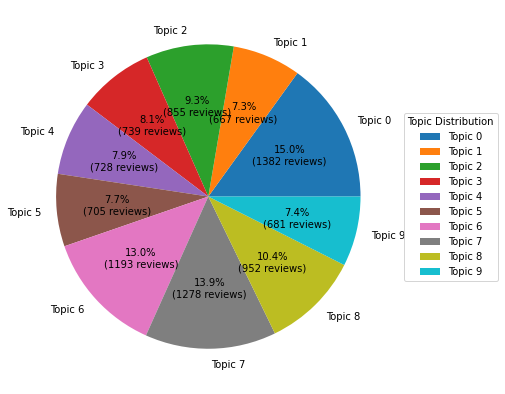

In [ ]:
topic_review_count = {}
for i in range(0,10):
  topic_review_count[i] = 0
for doc in doc_topic:
  topic_review_count[doc_topic[doc]] += 1
fig = plt.figure(figsize =(15, 7))
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} reviews)".format(pct, absolute)
df_topic_review_count = pd.DataFrame(topic_review_count.values(),index = topic_review_count.keys(),columns = ['count'])
fig, ax = plt.subplots(figsize =(10, 7))

wedges, texts, autotexts = ax.pie(df_topic_review_count ,
                                  labels =  ['Topic '+str(topic_number) for topic_number in topic_review_count.keys()],
                                  autopct = lambda pct: func(pct, df_topic_review_count),)
ax.legend(wedges, ['Topic '+str(topic_number) for topic_number in topic_review_count.keys()],
          title ="Topic Distribution",
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [ ]:
"""" Saving the extracted attributes as per specified format 
     Will be visualizing the keywords related to attributes in Presentation Layer """

train['att'] = pd.DataFrame.from_dict(review_att,orient = 'index')
train[['id','att']].to_csv('aj27028_attributes.csv',index = False)
train[['content','product','brand','att']].tail()

,content,product,brand,att
9180,thanks go speedwayjim extra lovely orange colo...,IPA\nSweetWater Brewing Company,Sweetwater,"beer,flavor,crisp,citrus,light"
9181,pours hazy orangeish amber smells interesting ...,IPA\nSweetWater Brewing Company,Sweetwater,"beer,orange,malt,flavor,aroma"
9182,medium amber color citrus aroma flavor certain...,samuel-adams-barrel-room-collection-stony-broo...,Samuel Adams,"beer,bottle,taste,aroma,citrus"
9183,would would oz bottle amber brown malty bread ...,sierra-nevada-three-floyds-beer-camp-chico-king,Sierra Nevada,"beer,flavor,aroma,color,light"
9184,nice beer loved series fruit light tart lots b...,elysian-12-beers-of-apocalypse-10-omen-belgian...,Elysian,"fruit,beer,medium,citrus,malt"


document - words data

1. dW 2parts = 1st document topic matrix * 2nd topic word metrics  - SVD is another  

Training Word2Vec model to generate the word associated with the attributes extracted 
We'll be using this to visualize Word Clouds in presentation layer

In [ ]:
model = (gensim.models.Word2Vec(dataw2v,min_count = 10,size = 20,window =5,sg =1))

dic_wordcloud = {}
for word in list(Counter(list_of_attributes).keys()):
    d= model.wv.most_similar(word)

    ms = ",".join(list(map(lambda x: x[0],d[:5])))
    dic_wordcloud[word] = ms
    print("Word : {}\nSimilar Words : {}".format(word,ms))

Word : beer
Similar Words : michelob,budget,consumer,favourite,thing
Word : flavor
Similar Words : flavour,mineral,sweeter,taste,presence
Word : aroma
Similar Words : lasting,trace,scent,lacy,butterscotch
Word : color
Similar Words : fluffy,foamy,hue,inch,brewpub
Word : light
Similar Words : wheaty,gum,barn,doughy,bananas
Word : taste
Similar Words : flavor,light,quite,finish,oat
Word : caramel
Similar Words : toffee,butterscotch,sweet,earth,juniper
Word : medium
Similar Words : texture,duration,semi,slight,mouthfeel
Word : fruit
Similar Words : ripe,berry,stone,currant,woody
Word : chocolate
Similar Words : milk,roasty,coffee,liquorice,licorice
Word : crisp
Similar Words : refreshing,watermelon,flowery,wit,crackery
Word : citrus
Similar Words : biscuity,pith,dank,grapefruity,pale
Word : bottle
Similar Words : chestnut,snifter,september,source,brewpub
Word : drink
Similar Words : food,drinker,favorite,love,recommend
Word : coffee
Similar Words : milk,chocolate,roasty,smoky,espresso
Wor

**Objective 2:**

*Identify Attributes with greatest opportunity in form of top 10 attributes*

* We will find the sentiments according to each product reviews
* In order to identify the attributes the client need to focus, we'll filter the reviews based on sentiment score threshold, keeping positive and negative sentiments only
* Next we'll extract the Nouns associated across the reviews (NER)
* Finally based on frequency of extracted attribute nouns we'll rank them and extract the top 10 attributes

In [ ]:
train['sentiment'] = train['content'].apply(lambda x : TextBlob(x).sentiment[0])

In [ ]:
""" Performing NER based on sentiments """

featureList_se = []
dic_s = {}
for sent in tqdm(train.query('sentiment > 0.5 or sentiment < -0.5')['content']):
    tokenize_word_sent = nltk.word_tokenize(sent)
    taggedList_s = nltk.pos_tag(tokenize_word_sent)
    for i in taggedList_s:
        if(i[1]=='NN'):
            featureList_se.append((i[0]))

100%|██████████| 433/433 [00:00<00:00, 663.59it/s]


In [ ]:
for word in featureList:
    dic_s[word] = 0
for word in featureList:
    dic_s[word] = dic_s[word]+1
top10attributes = pd.DataFrame(nlargest(10,dic_s,key = dic_s.get),columns = ['top10'])

In [ ]:
""" Saving the top 10 attributes """

top10attributes.to_csv('aj27028_top10.csv',index = False)
top10attributes

,top10
0,head
1,beer
2,taste
3,aroma
4,flavor
5,medium
6,body
7,malt
8,carbonation
9,color


**Objective 3:**

*Summarize key observations at a brand level*

* We'll first be plotting the Wordclouds based on correlated keywords(from objective 1)
* Next we'll plot the brand wordcloud based on popularity across the frequency of reviews
* Finally we'll be analysing the sentiments across the popular brands

In [ ]:
length = len(dic_wordcloud)
i = 1
fig = plt.figure(figsize=[10,80])
plt.tight_layout()
plt.axis('off')
for word,similarities in sorted(dic_wordcloud.items()):
    ax = fig.add_subplot(length,1,i)
    ax.imshow(WordCloud().generate(similarities))
    ax.set_title("Attribute Word = {}".format(word),size = 20)
    ax.axis('off')
    i = i+1
plt.subplots_adjust(hspace=0.5)


Saving figure Popular Brands


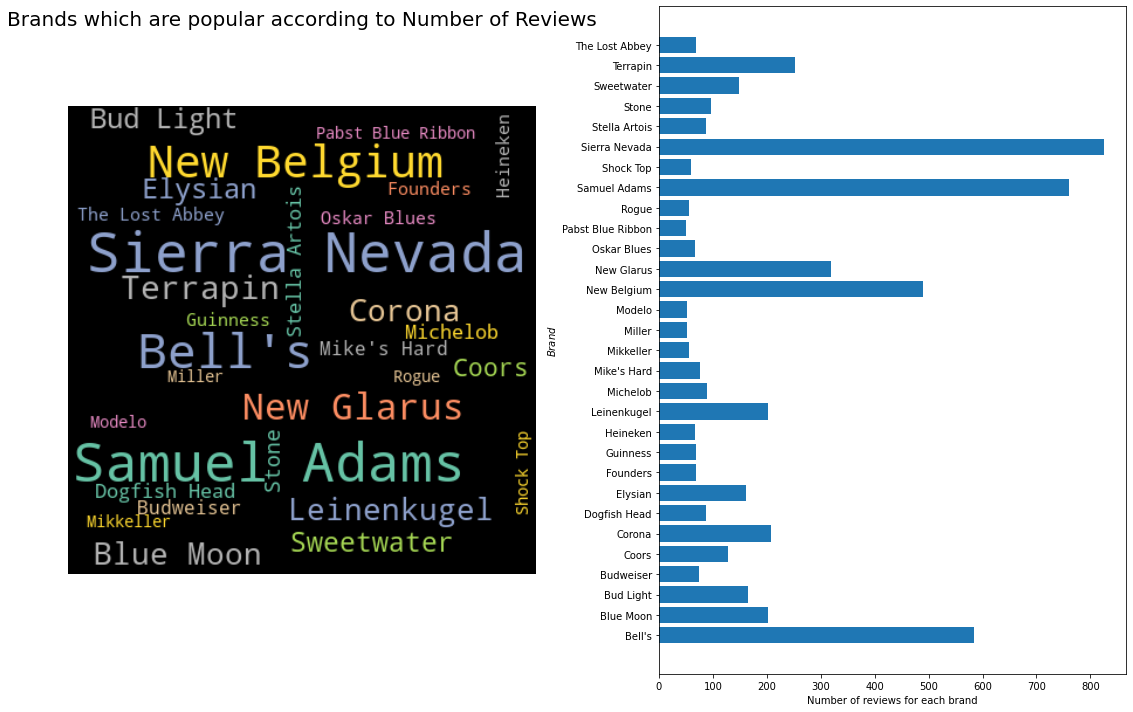

In [ ]:
reviews_at_brand = train.groupby(['brand']).size().reset_index(name = 'Count_of_Reviews')
number_of_reviews= reviews_at_brand.loc[reviews_at_brand['Count_of_Reviews'] > 50]
d = {}
for brand,count in number_of_reviews.values:
    d[brand] = count
plt.figure(figsize = [15,10])
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(WordCloud(colormap='Set2',height = 400).generate_from_frequencies(frequencies = d),interpolation = 'bilinear')
plt.subplot(1,2,2)
plt.axis('on')
plt.barh(number_of_reviews['brand'],number_of_reviews['Count_of_Reviews'])
plt.suptitle("Brands which are popular according to Number of Reviews",ha = 'right',fontsize = 20)
plt.gca().set(ylabel = '$Brand$',xlabel = 'Number of reviews for each brand')
plt.tight_layout()
save_fig("Popular Brands")

Saving figure Sentiment score


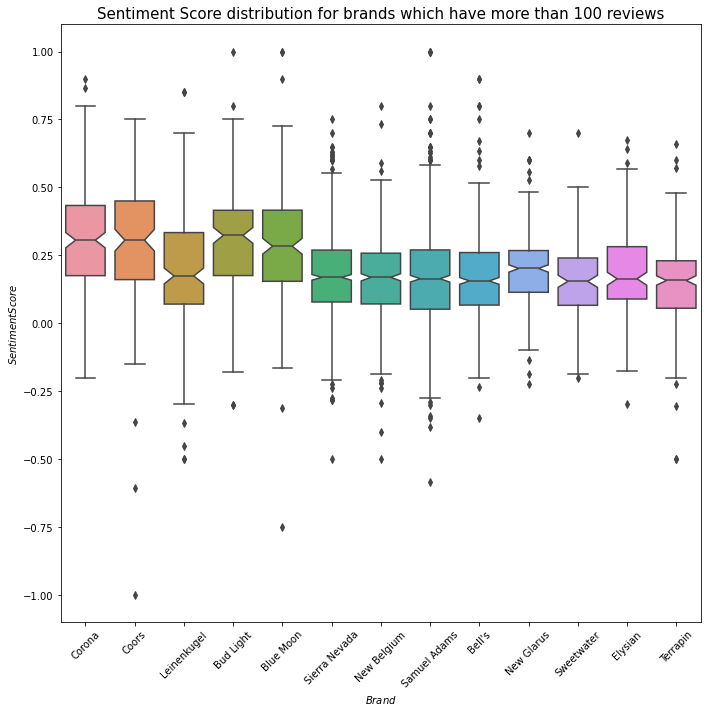

In [ ]:
train_new = pd.merge(train,reviews_at_brand,on = 'brand')
brands_to_visualize = (train_new.loc[(train_new.Count_of_Reviews > 100)])
brand_sentiments = brands_to_visualize.groupby(['brand']).agg({'sentiment':np.mean}).reset_index()
brands = brand_sentiments.brand
plt.figure(figsize = [10,10])
sns.boxplot(x = 'brand',y = 'sentiment',notch = True, data = train.loc[train.brand.isin(brands)])
plt.title('Sentiment Score distribution for brands which have more than 100 reviews',fontsize = 15)
plt.xticks(rotation = 45)
plt.gca().set(xlabel = '$Brand$',ylabel = '$Sentiment Score$')
save_fig("Sentiment score")

In [ ]:
data_new = train.loc[train.brand.isin(brands)]
dy_data = data_new.groupby(['brand','product']).agg({'sentiment':np.mean}).reset_index()

In [ ]:
fig = go.Figure()
brand_list = data_new.brand.unique()

fig.layout = {}
for brand in brand_list:
  fig.add_trace(go.Bar(x = dy_data['product'][dy_data['brand']==brand],y = dy_data['sentiment'][dy_data['brand']==brand],orientation='v',name = brand))

buttons = []

for i, brand in enumerate(brand_list):
    args = [False] * len(brand_list)
    args[i] = True
    
    #create a button object for the country we are on
    button = dict(label = brand,
                  method = "update",
                  args=[{"visible": args}])
    
    #add the button to our list of buttons
    buttons.append(button)
    
fig.update_layout(
    updatemenus=[dict(
                    active=0,
                    type="dropdown",
                    buttons=buttons,
                    xanchor = 'left',
                    yanchor = 'bottom'
                )], 
    autosize=True,
    width=1500,
    height=800,
    xaxis1_rangeslider_visible = True,
    title=go.layout.Title(text="Sentiment Distribution across product brands with functionality to visualize average sentiment of product reviews under filtered brands")
)


fig
#save_fig("Sentiment Distribution")

### *End of  Case Study will work on Objective 4 in case of time left and save it locally*

###**Objective 4:**

**To Identify consumer needs based upon the reviews:**



1.   We concatenated all the noun part of the reviews by grouping them at brand
2.   After that aggregated the rating given at the brand level
3.   Train the simple LR and Random Forest Regressor model based on TF IDF score of the brand level noun keywords
4.  We used **SHAP** to gain and visualize the consumer needs
5. Also extracted the top 10 features (Objective) that impacts the model's output for rating  




In [ ]:
train['noun_review'] = all_sentences
new_train = train[['brand','noun_review']]
new_train['brand_review'] = new_train[['brand','noun_review']].groupby(['brand'])['noun_review'].transform(lambda x : ' '.join(x))
new_train = new_train[['brand','brand_review']].drop_duplicates()
new_train = new_train.merge(train[['brand','rating']].groupby('brand').mean().reset_index(),on = 'brand')

In [ ]:
new_train.columns = ['brand','brand_review','rating']
new_train

,brand,brand_review,rating
0,Budweiser,sweet drinking sugar thing catch quick buzz he...,3.756757
1,Goose Island,choice price talk goose island chicago choice ...,3.580645
2,Rolling Rock,enjoy rock super summer day beer crisp refresh...,4.214286
3,Corona,beer home pack corona grocery store family gro...,4.541063
4,Coors,flavor taste beach bonfire good time summer pa...,3.535659
...,...,...,...
880,George Killian's,wilmington island ga kroger supermarket head l...,2.692857
881,AC Golden,pour tap avery sourfest pour head aroma acid f...,3.380000
882,Third,standard pint amber head mild malt taste hint ...,2.540000
883,Unknow,ipa hipster ipa perfect ipa jasmine bring bitt...,4.265000


In [ ]:
train_X, test_x ,train_y,test_y = train_test_split(new_train['brand_review'],new_train['rating'],test_size = 0.2)
 
vectorizer = TfidfVectorizer(max_features = 100)
X_train = vectorizer.fit_transform(train_X)
X_test = vectorizer.transform(test_x)

In [ ]:
model1 = sklearn.linear_model.LinearRegression()
model1.fit(X_train,train_y)

LinearRegression()

In [ ]:
explainer_LE = shap.LinearExplainer(model1, X_test, feature_dependence="independent")
shap_values_LE = explainer_LE.shap_values(X_test)
X_test_array = X_test.toarray() 

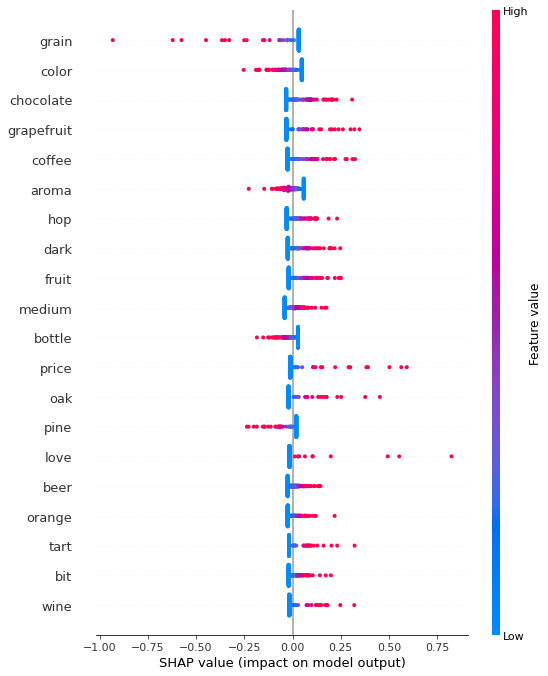

In [ ]:
shap.summary_plot(shap_values_LE, X_test_array, feature_names=vectorizer.get_feature_names())

In [ ]:
shap.initjs()
ind = 2
shap.force_plot(
    explainer_LE.expected_value, shap_values_LE[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names()
)

**Explanation of the force plot**
* *The features that were important to making the prediction for this observation are shown in red and blue, with red representing features that pushed the model score higher, and blue representing features that pushed the score lower*.
* *Features that had more of an impact on the score are located closer to the dividing boundary between red and blue,* 

* *The size of that impact is represented by the size of the bar.*

In [ ]:
test_x.tolist()[ind]

'cask beer color orange tan head aroma malty woody flavor leather wood note coffee medium body lure cocoa sweetness roastiness beer malt orange fruitiness carbonation transcendence creation undertaking bit candy taste candy sugar abc bottle light amber color finger head aromas orange peel honey suckle hint hint distance disappear proximity alot chimay tripel sweeter spicier mouthfeel attenuation carbonation style honey banana hint greet palate blood orange pineapple reduction level sweetness medium length revealing breath alcohol alcohol tripel end abv tom vanilla chocolate touch alcohol candy color head sweet candy alcohol medium body texture beer sweet finger head aroma citrus taste aroma medium body mouthfeel semi semi medium finish drinking apa namesake trail'

In [ ]:
regressor = sklearn.ensemble.RandomForestRegressor()
regressor.fit(X_train,train_y)

RandomForestRegressor()

In [ ]:
explainer = shap.TreeExplainer(regressor, X_train.toarray(), feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test.toarray())

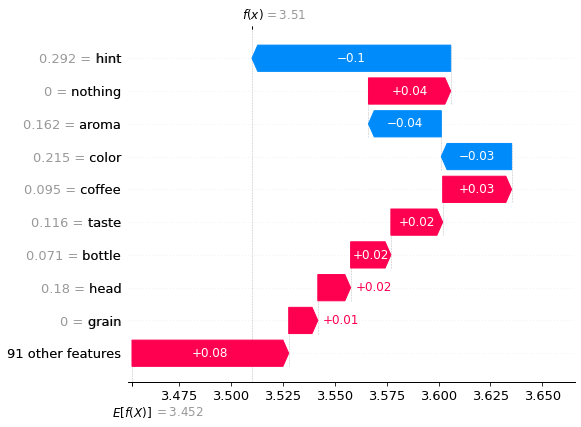

In [ ]:
shap.plots.waterfall(shap_values[ind,:])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,regressor.predict(X_test))

0.298869725719108

**Explanation of the waterfall plot**

*   *At the bottom, indicated with E[f(X)], we see the average prediction of the model over the test set, which is 3.452*
*   *At the top, indicated with f(x), we see the prediction of the model for the specific sample, which is 3.51*
*  *How did the model go from the average prediction 3.452 to the specific prediction 3.51 for this specific sample? The increment/decrement brought by each word is shown in the plot. For example, the word “color”, with its TF-IDF score of 0.215, contributed to a 0.03 decrement of the prediction.*
* *Analyzing the increments and decrements brought by all the features, we obtain an explanation of why the model predicted a specific value, starting from the average value.*

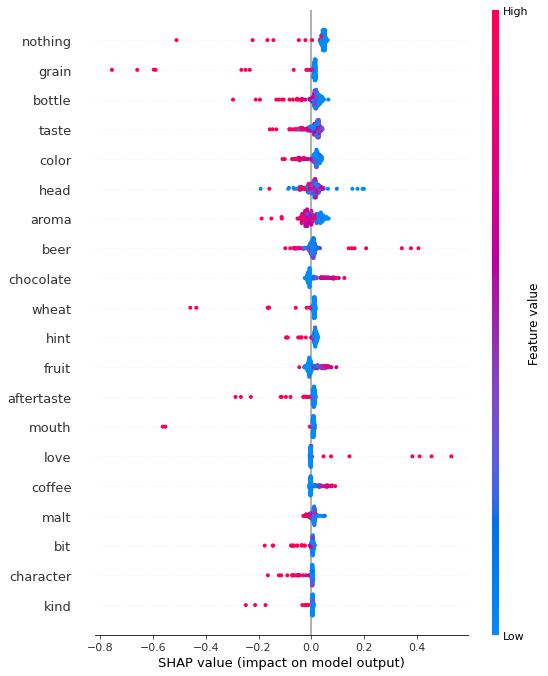

In [ ]:
shap.summary_plot(shap_values, X_test.toarray(), feature_names=vectorizer.get_feature_names())

This plot is made of many dots. Each dot has three characteristics:

*   Vertical location shows what feature it is depicting
*   Color shows whether that feature was high or low for that row of the dataset
* Horizontal location shows whether the effect of that value caused a higher or lower prediction.



In [ ]:
vals = np.abs(shap_values.values).mean(0)
feature_names = vectorizer.get_feature_names()

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.head(10)

,col_name,feature_importance_vals
68,nothing,0.051006
47,grain,0.031612
15,bottle,0.028469
89,taste,0.025368
29,color,0.025233
50,head,0.025085
7,aroma,0.024967
10,beer,0.021382
24,chocolate,0.019253
96,wheat,0.018865


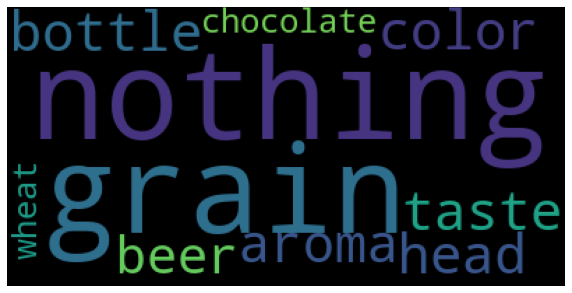

In [ ]:
plt.figure(figsize = [10,7])
plt.axis('off')
plt.imshow(WordCloud().generate(','.join(a for a in feature_importance.head(10).col_name)))